<a href="https://colab.research.google.com/github/mzs0153/ELEC-7970-Reinforcement-Learning/blob/main/SARSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Creating Taxi Environment from OpenAI gym
You can find documentation here: https://gym.openai.com/envs/Taxi-v3/

In [11]:
import gym #import open AI gym
import numpy as np #import numpy 
import matplotlib.pyplot as plt
env = gym.make("Taxi-v3") #Make Taxi-v3 environment. 
state = env.reset() #reset the state of the environment
print(state) #print the value of initial state
env.render() #render the environment

147
+---------+
|R: | : :G|
| : | : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+



In [12]:
n_states = env.observation_space.n
n_actions = env.action_space.n

# Epsilon-Greedy Policy

In [13]:
def eps_greedy(Q, eps):
  p = np.random.random()
  if (p < eps):
    return env.action_space.sample()
  else:
    return np.argmax(Q)
  

# On-Policy TD Control
#SARSA 

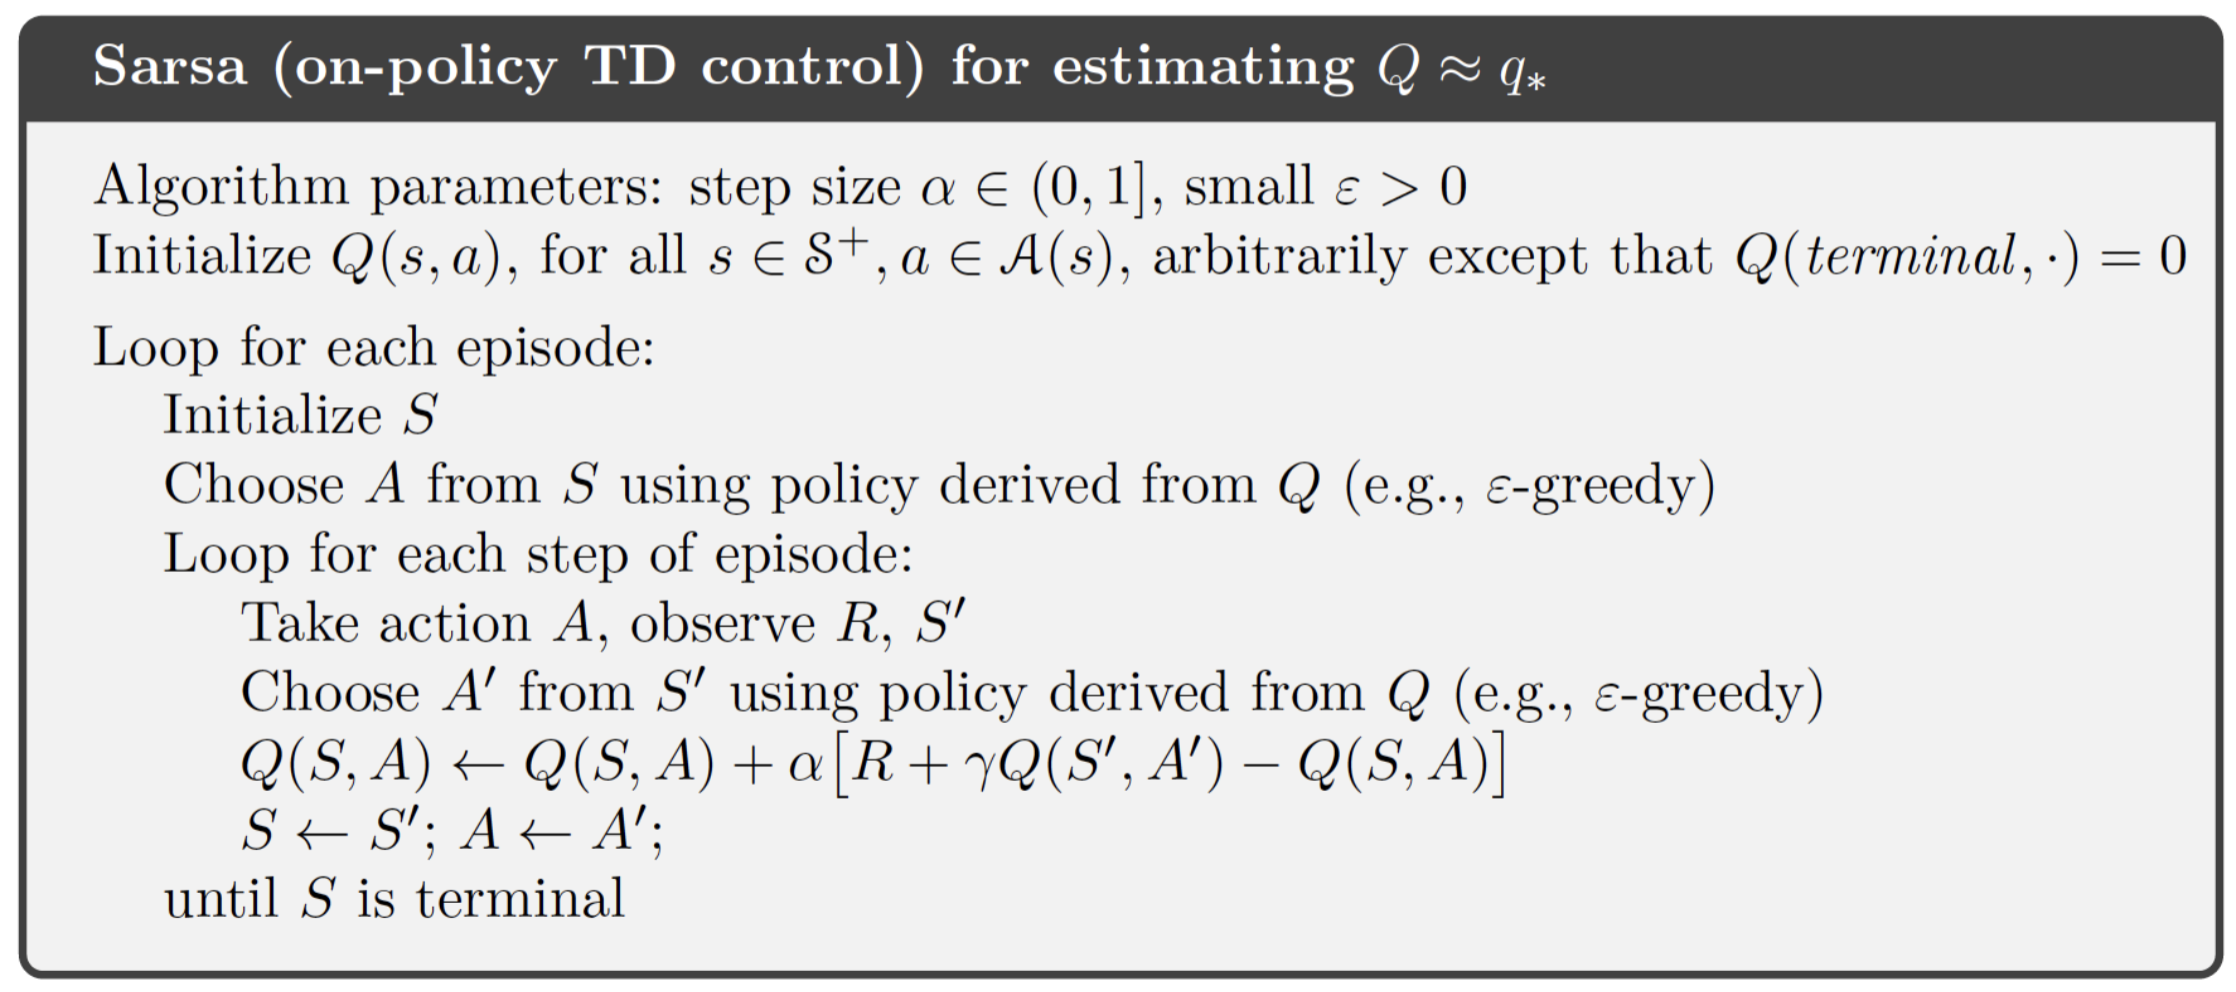

In [14]:
Q_Sarsa = np.zeros([n_states, n_actions])
alpha = 0.1
gamma=0.9
episodes = 5000
eps=0.1


for episode in range(episodes):
    Termination = False
    G, reward = 0,0
    state = env.reset() #Initialize the state S 
    action=eps_greedy(Q_Sarsa[state], eps) #??? #Choose action A from S using policy derived from Q value. (epsilon-greedy approach)
    t=0
    while Termination != True:
        t+=1
        state2, reward, done, _ = env.step(action) #Take Action A and Observe the next state S' and reward 
        action2= eps_greedy(Q_Sarsa[state2], eps/t) #Take next action A' using policy derived from Q value. (epsilon-greedy approach).
        #Update Q value ????
        Q_Sarsa[state, action]=Q_Sarsa[state, action]+alpha*(reward+gamma*Q_Sarsa[state2, action2]-Q_Sarsa[state, action])
        G += reward
        state =state2 #Assign the next state
        action=action2 #Assign the next action
        if (done):
          Termination=True

# Evaluating The Agent's Performance

In [15]:
epsiodes=100
RewardTracker=[]
TimeStepTracker=[]
for episode in range(episodes):
    Termination = False
    G, reward = 0,0
    iteration=0
    s=env.reset()
    while Termination != True:
        iteration+=1
        a=np.argmax(Q_Sarsa[s])
        s, reward, done, _ = env.step(a) 
        G+=reward
        if (done):
          Termination=True
    RewardTracker.append(G)
    TimeStepTracker.append(iteration)
print('Sum of Rewards Per Episode: {}'.format(sum(RewardTracker)/len(RewardTracker)))
print('Average Timesteps Taken: {}'.format(sum(TimeStepTracker)/len(TimeStepTracker)))

Sum of Rewards Per Episode: 6.7976
Average Timesteps Taken: 14.0806
